# **ELG 7172B : **: Homework 3 Solutions

##### Solutions are prepared by Issa Ayoub, Xioayan Li, Yifeng Zhang, Srinivas Ayachitula with small corrections by Miodrag Bolic  <br>



### Instructions:

+ Upload your answers in an ipython notebook to UOttawa Bright Space.

+ Your individual submissions should use the following filenames: ELG_7172B_YOURNAME_HW3.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different format. 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: ELG_7172B_YOURNAME_HW3.tar.gz or ELG_7172B_YOURNAME_HW3.zip



_ _ _ _ _

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats as stats

# Problem 1:
This problem is from Estimation and Inference lectures by Hilary 2007 http://www.robots.ox.ac.uk/~az/lectures/est/lect34.pdf 

Consider two sensors that measure the length of the object where the measurements $z_1$ and $z_2$ from the sensors are modelled as independent normal distributions: <br>
$z_1 = \theta + w_1, p(z_1|\theta)$ ∼ $N(\theta, {\sigma_1}^2)$ <br>
$z_2 = \theta + w_2, p(z_2|\theta)$ ∼ $N(\theta, {\sigma_2}^2)$ <br>

We have prior information: $p(\theta) ∼ N(\theta_p, {\sigma_p}^2)$. Please note that the same problem was done in the class for N measurements. <br>
a) What is the MAP estimate and the standard error ($\sigma$)?<br>
b) Assume that ${σ_p}^2$ changes its value from 50 up to 3000 in steps of 50. Assume that the we have $p(z_1|\theta)$ ∼ $N(\theta, 10^2)$, $p(z_2|\theta)$ ∼ $N(\theta,20^2)$, and the prior is $p(\theta) ∼ N(150, {\sigma_p}^2)$. Suppose we obtain sensor readings of $z_1$ = 130, $z_2$ = 170. Write a Python program that computes MAP estimates as a function of ${\sigma_p}^2$. <br>
c) Write a program in Python that draws on the same figure prior, likelihood and posterior when ${\sigma_p}^2=30^2$. <br>
d) What is maximum likelihood estimate and the standard error. <br>
e) How do MAP and ML compare? What happens in the graph in part b) when ${\sigma_p}^2$ is very large? <br>


## Answer

Using Bayes theorem:
$f_{\Theta | X} (\theta | x) = \frac{f_{X | \Theta} (x | \theta)\ *\ f_{\Theta (\theta)}}{f_X (x)}$ <br>
where:

$f_{\Theta} (\theta) = \frac{e^{-\frac{(\theta - \theta_p)^2}{2 \sigma_p^2}}}{\sigma_p \sqrt{2 \pi}}$

$f_{X_1 | \Theta} (x_1 | \theta) = \frac{e^{-\frac{(x_1 - \theta)^2}{2 \sigma_1^2}}}{\sigma_1 \sqrt{2 \pi}}$

$f_{X_2 | \Theta} (x_2 | \theta) = \frac{e^{-\frac{(x_2 - \theta)^2}{2 \sigma_2^2}}}{\sigma_2 \sqrt{2 \pi}}$

Then, since the measurments from the sensors are modelled as independent random variables =>

$f_{X | \Theta} (x | \theta) = f_{X_1, X_2 | \Theta} (x_1, x_2 | \theta) = f_{X_1 | \Theta} (x_1 | \theta) * f_{X_2 | \Theta} (x_2 | \theta)$ 

Hence, replacing that into the Bayes formula =>

$f_{\Theta | X} (\theta | x) = \frac{\frac{e^{-\frac{(\theta - \theta_p)^2}{2 \sigma_p^2}}}{\sigma_p \sqrt{2 \pi}} * \frac{e^{-\frac{(x_1 - \theta)^2}{2 \sigma_1^2}}}{\sigma_1 \sqrt{2 \pi}} * \frac{e^{-\frac{(x_2 - \theta)^2}{2 \sigma_2^2}}}{\sigma_2 \sqrt{2 \pi}}}{f_X (x)} = c(x) * e^{-\frac{(\theta - \theta_p)^2}{2 \sigma_p^2}} * e^{-\frac{(x_1 - \theta)^2}{2 \sigma_1^2}} * e^{-\frac{(x_2 - \theta)^2}{2 \sigma_2^2}} = c(x) e^{-\frac{(\theta - \theta_p)^2}{2 \sigma_p^2} -\frac{(\theta - x_1)^2}{2 \sigma_1^2} -\frac{(\theta - x_2)^2}{2 \sigma_2^2}}$ 

Therefore, the answer has a quadratic form => the posterior follows a normal distribution. Therefore, the Maximum a postriori coincides with the mean of the normal distribution. Therefore, we solve for the derivative with respect to theta and set it to 0. Hence:

$\frac{\theta - \theta_p}{\sigma_p^2} + \frac{\theta - x_1}{\sigma_1^2} + \frac{\theta - x_2}{\sigma_2^2} = 0$ =>

$\theta_{MAP} = \frac{\frac{\theta_p}{\sigma_p^2} + \frac{x_1}{\sigma_1^2} + \frac{x_2}{\sigma_2^2}}{\frac{1}{\sigma_p^2} + \frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}}$

Or, we can write the posterior as the following form: $c.e^{-(\alpha x^2 + \beta x + \gamma)}$ where $\alpha > 0$. Then solve for mean and variance where: $\mu = -\frac{\beta}{2 \alpha}$ and variance = $\frac{1}{2\alpha}$

Therefore, $\theta^2 (\frac{1}{2 \sigma_p^2} + \frac{1}{2 \sigma_1^2} + \frac{1}{2 \sigma_2^2}) + \theta (-\frac{\theta_p}{\sigma_p^2} - \frac{x_1}{\sigma_1^2} - \frac{x_2}{\sigma_2^2}) + \frac{\theta_p^2}{2 \sigma_p^2} + \frac{x_1^2}{2 \sigma_1^2} + \frac{x_2^2}{2 \sigma_2^2}$ =>

$\mu = -\frac{\beta}{2 \alpha} = \frac{\frac{\theta_p}{\sigma_p^2} + \frac{x_1}{\sigma_1^2} + \frac{x_2}{\sigma_2^2}}{\frac{1}{\sigma_p^2} + \frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}}$ and $\sigma^2 = \frac{1}{\frac{1}{\sigma_p^2} + \frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}}$

Standard error is the standard deviation = $\sqrt{\sigma^2}$


(60,) (60,)


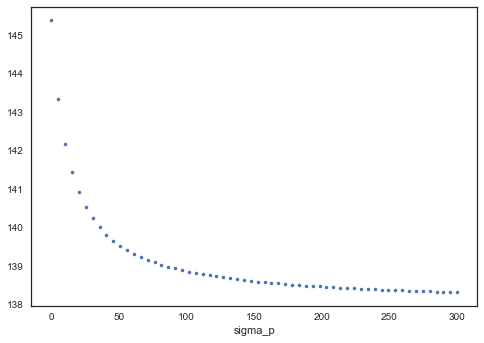

In [32]:
# b)
#import mpld3
#mpld3.enable_notebook()

var_p = np.arange(50, 3001, 50)
x1 = 130
x2 = 170
stdx1 = 10
stdx2 = 20

values = []
theta = np.linspace(start=0, stop=300, num=60)

for var_p_ in var_p:
    # for the mean while we are going to ignore the f(x) and I will assume that it is a constant. Therefore:
#     posterior = lambda theta: np.exp(- (
#             (theta - 150)**2/(2*np.sqrt(var_p_)) + (theta - x1)**2/(2*stdx1**2) + (theta - x2)**2/(2*stdx2**2)
#                        ))
#     plt.plot(theta, posterior(theta), '.')

    theta_MAP = (150/(var_p_) + x1/(stdx1**2) + x2/(stdx2**2)) / (1/var_p_ + 1/(stdx1**2) + 1/(stdx2**2))
    values.append(theta_MAP)

print(np.shape(theta), np.shape(values))
plt.plot(theta, values, '.')
plt.xlabel('sigma_p')

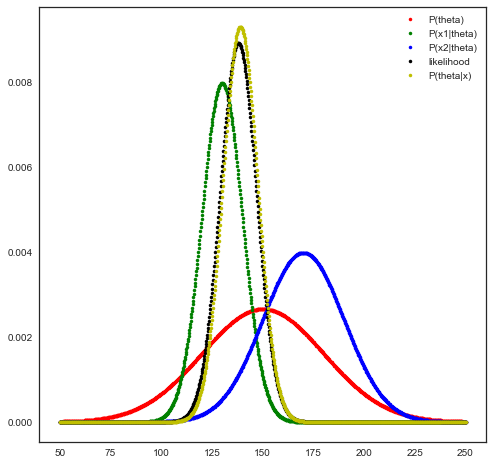

In [40]:
#c) 
stdx1 = 10
stdx2 = 20

x = np.linspace(start=50, stop=250, num=1000)
theta = stats.norm.pdf(x, loc=150, scale=30)/np.sum(theta)
Prob_x1_given_theta = stats.norm.pdf(x, loc=130, scale=stdx1)/np.sum(Prob_x1_given_theta)
Prob_x2_given_theta = stats.norm.pdf(x, loc=170, scale=stdx2)/np.sum(Prob_x2_given_theta)
theta = theta/np.sum(theta)
Prob_x1_given_theta = Prob_x1_given_theta/np.sum(Prob_x1_given_theta)
Prob_x2_given_theta = Prob_x2_given_theta/np.sum(Prob_x2_given_theta)

# Posterior:
likelihood=Prob_x1_given_theta * Prob_x2_given_theta/np.sum(Prob_x1_given_theta * Prob_x2_given_theta)
P_Theta_given_x = theta * likelihood/np.sum(theta * likelihood)


# Draw figures
plt.figure(figsize=(8, 8))
plt.plot(x, theta, 'r.', label="P(theta)")
plt.plot(x, Prob_x1_given_theta, 'g.')
plt.plot(x, Prob_x2_given_theta, 'b.')
#plt.figure(figsize=(5, 5))
plt.plot(x, likelihood, 'k.')
plt.plot(x, P_Theta_given_x, 'y.')
plt.legend(['P(theta)', 'P(x1|theta)', 'P(x2|theta)', 'likelihood', 'P(theta|x)'])



In [41]:
index_max = np.argmax(P_Theta_given_x)
print('MAP=',x[index_max])
index_max = np.argmax(likelihood)
print('ML=',x[index_max])

MAP= 138.888888889
ML= 138.088088088


$\textbf{Answer (d):}$ <br>
From Answer (a), we know that
$p(z_1,z_2|\theta)=c e^{ - \big( \frac{(z_1-\theta)^2}{2\sigma_1^2} + \frac{(z_2-\theta)^2}{2\sigma_2^2} \big) }$. <br>

Thus, <br>
$\theta_{MLE}=\frac{\displaystyle \frac{z_1}{\sigma_1^2} +\frac{z_2}{\sigma_2^2}}{\displaystyle \frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}}$,

mean squared error:<br>
$E[( \Theta - \hat{\theta}_{MLE})^2]= var(\Theta) = \displaystyle\frac{1}{\displaystyle\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}}$.<br>

Since<br>
$var(\hat{\Theta}_{MLE})=(\frac{1}{\frac{1}{\sigma_1^2}+\frac{1}{\sigma_2^2}})^2 var(\frac{z_1}{\sigma_1^2} + \frac{z_2}{\sigma_2^2})=(\frac{1}{\frac{1}{\sigma_1^2}+\frac{1}{\sigma_2^2}})^2 (\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2})$, <br>
Thus, <br>
the standard error is $\sqrt{var(\hat{\Theta}_{MLE})}=\frac{\sqrt{\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}}}{\frac{1}{\sigma_1^2}+\frac{1}{\sigma_2^2}}$.

From the figure, we can see that the prior is modified by providing new data. The data point that has less variance contributes more to the likelihood and therefore postrior. Prior information does not contribute much to the posterior due to large variance of the prior.  

d) If $\sigma_p$ is large, then MAP estimate is similar to ML estimate. If $\sigma_p$ is small MAP estimate becomes close to $theta_p$.

# Problem 2:
This problem is from Estimation and Inference lectures by Hilary 2007 http://www.robots.ox.ac.uk/~az/lectures/est/examples1.pdf 

Joint probabilities for the discrete random variables X, Z are given by<br>

 | X = 1 | X = 2 | X = 3
------------ | -------------
Z = 1 | 0.2 |0.07 |0.06
Z = 2| 0.09 |0.1 |0.01
Z = 3 |0.02 |0.12 |0.09
Z = 4 |0.06 |0.08| 0.1

(a) Check the normalisation of the joint distribution <br>
(b) Compute the marginal probability distributions for X, Z.<br>
(c) Compute the conditional distribution P(Z|X = 3)<br>
(d) Use Bayes’ rule to compute P(X = 3|Z = 4) using only information in the previous 2 parts; then check the answer by direct calculation from the table above.<br>
e) (Bonus) Write Python code to compute marginal and conditional distribution in (b) and (c). You can see how to compute marginal densities here: http://python-for-signal-processing.blogspot.ca/2012/11/conditional-expectation-and-mean.html or you can find your own way. <br>



## Answer
$\textbf{Answer (a):}$ <br>
$\sum_{i=1}^3\sum_{j=1}^4 P(X_i,Z_j) = 0.2 +0.07 + 0.06 + 0.09 + 0.1 + 0.01 +0.02 + 0.12 +0.09 + 0.06 + 0.08 + 0.1 = 1$ <br>
Therefore, the joint distribution is normalized.<br><br>
$\textbf{Answer (b):}$ <br>
$P(X=1) = \sum\limits_{j=1}^{4}P(X_1,Z_j) = 0.2 + 0.09 + 0.02 +0.06 = 0.37$<br>
$P(X=2) = \sum\limits_{j=1}^{4}P(X_2,Z_j) = 0.07 + 0.1 + 0.12 + 0.08 = 0.37$<br>
$P(X=3) = \sum\limits_{j=1}^{4}P(X_2,Z_j) = 0.06 + 0.01 + 0.09 + 0.1 = 0.26$<br>
$P(X=1) = \sum\limits_{i=1}^{3}P(X_i,Z_1) = 0.2 + 0.07 +0.06 = 0.33$<br>
$P(Z=2) = \sum\limits_{i=1}^{3}P(X_i,Z_2) = 0.09 + 0.1 +0.01 = 0.2$<br>
$P(Z=3) = \sum\limits_{i=1}^{3}P(X_i,Z_3) = 0.02 + 0.12 +0.09 = 0.23$<br>
$P(Z=4) = \sum\limits_{i=1}^{3}P(X_i,Z_4) = 0.06 + 0.08 +0.1 = 0.24$<br>

$\textbf{Answer (c):}$ <br>
From Bayes theorem: $P(X,Z) = P(Z|X)P(X)$, we have $P(Z|X) = \frac{P(Z,X)}{P(X)}$<br>
$P(Z = 1|X = 3) = \frac{P(Z = 1,X = 3)}{P(X = 3)} = 0.06/0.26 = 0.23$<br>
$P(Z = 2|X = 3) = \frac{P(Z = 2,X = 3)}{P(X = 3)} = 0.01/0.26 = 0.04$<br>
$P(Z = 3|X = 3) = \frac{P(Z = 3,X = 3)}{P(X = 3)} = 0.09/0.26 = 0.35$<br>
$P(Z = 4|X = 3) = \frac{P(Z = 4,X = 3)}{P(X = 3)} = 0.1/0.26 = 0.38$<br>

$\textbf{Answer (d):}$ <br>
As above, $P(Z|X) = \frac{P(Z,X)}{P(X)}$. 
$P(X = 3|Z = 4) = \frac{P(Z=4|X=3)P(X=3)}{P(Z=4)} = \frac{\frac{0.1}{0.26}\times 0.26}{0.24} = 0.417$<br>
From the table, we can still get the same result $P(X = 3|Z = 4) = \frac{P(X=3,Z=4)}{P(Z=4,X=1) + P(Z=4,X=2) + P(Z=4,X=3)} = 0.1/(0.06 + 0.08 +0.1) = 0.417$

# Problem 3:

Perform linear regression using the linear regression command given in Python  - please see https://github.com/EFavDB/linear-regression for info on how to do that. 

Consider the following two-dimensional data, in which X is the independent
variable, and Y is the dependent variable 

xi |yi
------------ | -------------
0 |25
1 |36
2 |47
3 |64
4 |81

(a) Find the best-fit parameters a, b of the linear regression curve
$$y(x)=a + bx$$
also find the errors in the best-fit parameters and the correlation coefficient between them; <br>
(b) Find the minimum mean square error of the fit. <br>
(c) Show in the figure the curve that is fitted, error bars and confidence intervals. <br>
(d) Explore at least 3 more parameters that are provided as a result of sm.OLS().fit(). Provide explanation of the parameter and if the value that is obtained is reasonable, small or large of that parameter. <br>

## Answer

[[ 22.6]
 [ 36.6]
 [ 50.6]
 [ 64.6]
 [ 78.6]]
Errors 9.6
MSE 5.04
Correlation Coefficient: [ 0.99363276]


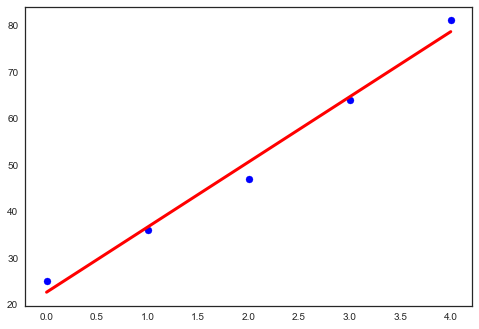

In [42]:
from sklearn import linear_model, metrics

x = np.array([0, 1, 2, 3, 4])
y = np.array([25, 36, 47, 64, 81])

plt.scatter(x, y, color='blue')

# Create the linear regression model
regr = linear_model.LinearRegression()

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

# Train the model using training sets
regr.fit(x, y)

predictions = regr.predict(x)
print(predictions)
# Plot outputs
plt.plot(x, predictions, color='red', linewidth=3)

# Errors in the fit:
errors = np.sum(np.abs(np.subtract(predictions, y)))
print("Errors", errors)

# Mean square error:
MSE = metrics.mean_squared_error(y, predictions)
print("MSE", MSE)

# Correlation Coefficient between x and y:
r, p = stats.pearsonr(x, y)
print("Correlation Coefficient:", r)

a) slope = b = $\frac{y_1 - y_0}{x_1 - x_0} = \frac{36.6 - 22.6}{1-0} = 14$ 

y-intercept = a = y0 (where x = 0) = 22.6.

b) mean sqaure error: MSE = $\sum_{i=0}^{4} \frac{(y_{pred} - y_i)^2}{5} = 5.046$

C:\Users\mbolic\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 06 Feb 2018   Prob (F-statistic):           0.000609
Time:                        13:58:28   Log-Likelihood:                -11.138
No. Observations:                   5   AIC:                             26.28
Df Residuals:                       3   BIC:                             25.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6000      2.245     10.067      0.0

C:\Users\mbolic\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<Container object of 3 artists>

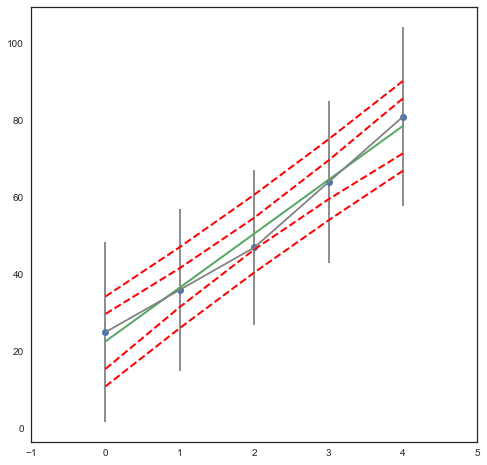

In [43]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table

x = [0, 1, 2, 3, 4]
y = [25, 36, 47, 64, 81]

X = sm.add_constant(x)

regr = sm.OLS(y, X).fit()

print(regr.summary())
# print(dir(regr))
print(regr.tvalues, ".........")
# Therefore, as we can see coefficient, or the slope of the regression line is x1 = b = 14, and the Y-intercept = a = 22

st, data, ss2 = summary_table(regr, alpha=0.05)
fittedvalues = data[:,2]
# This is the standard error. 
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

# This is the confidence interval for our observations, which includes an estimate of the error as well. 
predict_ci_low, predict_ci_upp = data[:,6:8].T

plt.figure(figsize=(8, 8))
plt.xlim(-1, 5)
plt.plot(x, y, 'o')
plt.plot(x, fittedvalues, '-', lw=2)
plt.plot(x, predict_ci_low, 'r--', lw=2)
plt.plot(x, predict_ci_upp, 'r--', lw=2)
plt.plot(x, predict_mean_ci_low, 'r--', lw=2)
plt.plot(x, predict_mean_ci_upp, 'r--', lw=2)
plt.errorbar(x, y, xerr=0, yerr=(predict_ci_upp - predict_ci_low), color='grey')

d) One parameter provided as a result of sm.OLS().fit() is the **standard error**. the equation of this error is: 

$\sqrt{\frac{\sum_{i=1}^{n} (y - y')^2}{n - 2}}$ Where y' is our predictions.Our values are:
predict_mean_se: [ 2.24499443  0.91651514] which is considered small. The larger the disperesed is our data, or the more they are far away from the regression line, or predictions, the larger this error will be. 
rd error is 5.02 which is low.

$$E_{mmse}=(1-r^2)var_y$$

** t value **

The measure of statistical significiance of an independent variable b to explain dependent variable y is done by t-value.This can be calculated by dividing the estimated regression coefficient b by its standard error SB.That means the t-statistic tells how many standard errors the coefficient is away from zero.In general t value between -2 to +2 is accceptable.

For higher t-values the confidence of coefficient as a predictor will be higher.In the same way if the t value is lower then the reliability of the predictive power of that coefficient will be low.

In our case, we get values: [ 10.06684011  15.27525232] which are considered high to reject the null hypothesis which is, there is no correlation.


** Adjusted R squared **

Adjusted R squared is a corrected goodness-of-fit (model accuracy) measure for linear models. It finds the percentage of variance within the goal area this is explained by using the enter or inputs.

R2 has a tendency to optimistically estimate the fit of the linear regression. It continually will increase because the quantity of consequences are included in the model. Adjusted R2 attempts to accurate for this overestimation. it'd decrease if the effect does not enhance the model.

Adjusted R squared is calculated by dividing the residual imply square error by using the overall mean square error (that's the sample variance of the target discipline). The end result is then subtracted from 1.

It's value is less than or equal to R2. If the value of Adjusted R squared is 1 then it tells that the model perfecly predicts the values in the target field.But if it's value is less than or equal to 0 then we can say that the model is a non-predictive one.In the real world the Adjusted R value lies between 0 and 1.

If we take our case that Adjusted R value is 0.983 which is high and less than R squared value. As its value is approximately equal to 1 we can say that the model perfectly predict the values in the target field.

** R squared (correlation cofficient  $r^2$) **

This is a statistical measure which tells how closely the data is fitted to the regression line.R squared is also called as coefficient of determination

Generally if R=0 that means there is no correlation
          if R=1 that means perfectly correlated
          if R=-1 that means perfectly anti-correlated
In general greater the R squared value , better it fits the curve.this means for the curve to fit in a good manner the r value should be close to 1.

Usually R value will be between 0% to 100% i.e 0 to 1.
0% tells about the model that the variablity of the response is not around its mean
100% tells that the variablity of the response is around its means for a model


In our case, we got rsqaured of 0.987 which is high, which is good as well.

**Skew: **
A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).<br><br>
  
**Kurtosis:** 
A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).


# Problem 4:
Implement in Python example 19 from   https://pdfs.semanticscholar.org/0c35/cbd410af71673f0bcfd3107ccf6b30c8f2e7.pdf . Compare the results from the analysis in Python with the derived result in the document.

In [44]:
# Given the bias error in flow rate which should be corrected is +10%

tfw =0.0819  # themass flow per unit width of film Γ
tf =0.00028 #The thickness of the film δ 
vf= 0.093  #The volume of the fraction occupied by film

#The thickness of the film δ and the themass flow per unit width of film Γ are related


## Calculating Total expected error using the formula given in the link

from uncertainties import ufloat # Complex math and ufloat functions can be used if we install uncertainities package
import numpy as np

Bx=0.1 # resulting bias error 
Px=0.02 # expected precision uncertainity

Ux=np.sqrt(np.square(Bx)+np.square(Px)) #total expected error Ux formula
print('The total expected error Ux from the given formula Ux is ',Ux)

Ux_python = ufloat(0.1, 0.02)
print('The total expected error from python Ux_python is ',Ux_python)

ModuleNotFoundError: No module named 'uncertainties'

From the above ouput we can see that the total expected error in both cases of the flow measurement is not same.
If we calculate total expected error by formula it is $Ux=±0.102$ 
In the same way if we calculate total expected error in python code it is $0.100±0.020$ 
So the Total expected error should be either 0.08(0.100-0.02) or 0.12(-0.100+0.02) 

# Problem 5:<br>
This problem is from Chapter 2 of the bookC. Bailer-Jones, "Practical Bayesian Inference: A Primer for Physical Scientists," Cambridge University Press, 2017. <br>

Let us perform N measurements $x$ of the height of particular plant. We would like to estimate the mean of the measurements and we know that the height of that plant follows Normal distribution. We come up with 6 estimators:<br><br>

sum all $x$ and divide by N<br>
sum first K measurements and devide by K $(K<N)$<br>
average the smallest and the largest value<br>
sort all x and take the middle value (median)<br>
bin the data and take the most frequent (mode)<br>
disregard the measurement and select the value based on prior knowledge (for example 1 m).<br><br>
Which of these estimator (and why) is <br>
(a) unbiased <br>
(b) consistent <br>
(c) Comment on efficiency of these estimators.<br> 
Please use the definition of these terms (unbiased, consistent and efficient estimator) and see how the proposed estimators fit the definition.

From question, there are 6 estimators:
1. $\bar{X_n} = \frac{x_1+x_2+\dot+x_n}{n}$<br>
2. $\bar{X_k} = \frac{x_1+x_2+\dot+x_k}{k}$<br>
3. $\frac{min(X_n) + max(X_n)}{2}$<br>
4. median(X)<br>
5. mode<br>
6. prior value: 1m<br>

$\textbf{Answer(a):}$<br>
Let the mean of x is $\Theta$ and estimator of $\Theta$ is$\hat{\Theta}$. Unbias means $E[\hat{\Theta_n}] = \Theta$, ($n$ is sample size).<br>
$(1)$ $\bar{X_n} = \frac{X_1+\cdots+X_n}{n}$ is unbias, because $E[\bar{X_n}] = \frac{E[X_1+\cdots+X_n]}{n} = \frac{n \Theta}{n} = \Theta$, so $\bar{X_n}$ is unbiased.<br>
$(2)$ Similarly,<br>
$E[\bar{X_k}] = \frac{E[X_1+X_2+\cdots+X_k]}{k} = \frac{k \Theta}{k} = \Theta$ is unbiased. Here, we assume the sample sequence is not ordered.<br>
$(3,4)$ The mid-range $\frac{min(X_n) + max(X_n)}{2}$ and median(X) coincide with mean in normal distribution (because it is symetric), so they are unbiased.<br>
$(5)$ Because bin the data and take the most frequent (mode) still normal ditribution, and have the same mean as the population of x. So it is also unbiased.<br>
$(5)$ Values based on prior knowledge (for example 1m), follow uniform distribution. Thus, the prior is a biased estimator unless it happened to the the true value.<br>

$\textbf{Answer(b):}$<br>
From the definition of consistency, if $\hat{\Theta}_n \rightarrow \Theta, n \rightarrow \infty$, we say $\hat{\Theta}_n$ is consistent.<br>
$(1)$ $\bar{X_n} = \frac{x_1+x_2+\dot+x_n}{n}$, when $n \rightarrow \infty$, $\bar{X_n} \rightarrow \Theta$, so it is consistent.However, if $k$ is constant then it is inconsistent. <br>
$(2)$ $\bar{X_k} = \frac{x_1+x_2+\dot+x_k}{k}$, when $k \rightarrow \infty$, $\bar{X_k} \rightarrow \Theta$, so it is consistent.<br>
$(3)$ $\frac{min(X_n) + max(X_n)}{2} = \Theta$,  when $n \rightarrow \infty$, thus it is also consistent.<br>
$(4)$ median(X)=$\Theta$, when $n \rightarrow \infty$. <br>
$(5)$ When $n \rightarrow \infty$, the mode is actually the peak of p.d.f. $f(X)$, so it is consistent.<br>
$(6)$ prior value( 1m) is a constant, so it does not change as we collect more data, as $n \rightarrow \infty$. Thus it is inconsistent.<br>

$\textbf{Answer(c):}$<br>
From the definition of efficiency, we have fomula: $e(\hat{\Theta}) = \frac{\frac{1}{I(\Theta)}}{var(\hat{\Theta})}$, where $I(\Theta) = - E[\frac{\partial^2}{\partial\Theta^2}\log f(x,\Theta)|\Theta]$<br>
For normal distribution,<br>
$\log f(x|\mu,\sigma_2) = \log(\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-u)^2}{2\sigma^2}}) = -\log(\sqrt{2\pi\sigma}) - \frac{(x-\mu)^2}{2\sigma^2} = -\log(\sqrt{2pi\sigma}) - \frac{x^2-2x\mu+\mu^2}{2\sigma^2}$<br>
$\frac{\partial \log f(x)}{\partial\mu} = \frac{2x}{2\sigma^2} - \frac{2\mu}{2\sigma^2} =\frac{x}{\sigma^2} - \frac{\mu}{\sigma^2}, \frac{\partial^2\log f(x)}{\partial\mu^2} = -\frac{1}{\sigma^2}$<br>
So, $I(\Theta) = - E[-\frac{1}{\sigma^2|\mu}] = \frac{1}{\sigma^2} = \frac{1}{var(X)},$<br>
For $N$ samples, $I(\Theta)=\frac{N}{var(X)}=\frac{N}{\sigma^2}$. <br>
We also know that in (1), $var(\hat{\Theta})=\frac{\sigma^2}{N}$. Therefore, for the sample mean estimator in (1), efficiency $e(\hat{\Theta})=\frac{\frac{\sigma^2}{N}}{\frac{\sigma^2}{N}}=1$. Thus, (1) is the most efficient estimator for normal distribution. <br>

(2) Similarly, we can have $e(\hat{\Theta})=\frac{\frac{\sigma^2}{N}}{\frac{\sigma^2}{K}}=\frac{K}{N}<1$, less efficient than (1) for normal distribution.

(3) The mid-range estimator is an inefficient estimator.

(4) Studies (order statistics) show that $\text{median}(X_1,\cdots,x_N)$ approximates to $N(\mu,\frac{\pi\sigma^2}{2N})$. Thus, $e(\hat{\Theta})=\frac{2}{\pi}\approx 0.64<1$ in normal distribution.

(5) -.

(6) The uniform prior has the smallest varience so that it is the most efficient estimator.
